# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
       


City processed: new norfolk
City processed: mataura
City processed: carnarvon
City processed: vaini
City processed: alofi
City processed: kapaa
City processed: namie
City processed: jamestown
City processed: barrow
City processed: tuktoyaktuk
City processed: busselton
City processed: ahipara
City processed: qaanaaq
City processed: rikitea
City processed: sibu
City processed: bambous virieux
City processed: kilindoni
City processed: dzhebariki-khaya
City NOT found: illoqqortoormiut
City processed: cidreira
City processed: waipawa
City processed: puerto ayora
City processed: kavaratti
City processed: codrington
City processed: hasaki
City processed: narsaq
City processed: azangaro
City processed: tuatapere
City processed: albany
City processed: mar del plata
City processed: ushuaia
City processed: severo-yeniseyskiy
City processed: olinda
City processed: butaritari
City processed: makakilo city
City processed: pozo colorado
City processed: lompoc
City processed: bredasdorp
City processed

City processed: sabang
City NOT found: navabad
City processed: black river
City processed: golden
City processed: igarka
City processed: srednekolymsk
City processed: mwene-ditu
City NOT found: bokspits
City processed: margate
City processed: auki
City processed: bodden town
City processed: sorong
City processed: urusha
City NOT found: haibowan
City processed: isiro
City processed: bam
City processed: hanna
City processed: osa
City NOT found: grande-riviere
City processed: road town
City NOT found: ondorhaan
City processed: porto velho
City processed: mainpuri
City processed: kenai
City processed: novopokrovka
City processed: kenora
City processed: torbat-e jam
City processed: nikel
City processed: talnakh
City processed: asfi
City processed: komsomolskiy
City processed: san cristobal
City processed: pevek
City processed: san vicente
City processed: pisco
City processed: hovd
City processed: touros
City processed: maceio
City processed: tommot
City processed: burns lake
City processed:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [15]:
Weather_DF.to_csv('../output_data/Cities.csv', index = False)
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,new norfolk,AU,64.00,32,29,10.00,-42.7826,147.0587,1615686654
1,mataura,NZ,75.00,43,40,15.01,-46.1927,168.8643,1615686640
2,carnarvon,AU,89.60,48,32,16.11,-24.8667,113.6333,1615686702
3,vaini,TO,80.60,78,40,8.05,-21.2000,-175.2000,1615686650
4,alofi,NU,86.00,66,98,8.05,-19.0595,-169.9187,1615686821
...,...,...,...,...,...,...,...,...,...
557,shitkino,RU,6.39,89,100,16.28,56.3703,98.3543,1615686955
558,port hedland,AU,84.20,65,40,24.16,-20.3167,118.5667,1615686696
559,porto novo,BJ,84.20,79,40,11.50,6.4965,2.6036,1615686955
560,mumford,GH,81.45,79,100,12.80,5.2618,-0.7590,1615686956


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#  Get the indices of cities that have humidity over 100%.
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
badHumidityDF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [17]:
badHumidityDF.index

Int64Index([], dtype='int64')

In [19]:
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]
City_Data.to_csv('../output_data/City_Data.csv', index = False)
City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,new norfolk,AU,-42.7826,64.0,32,29,10.00,1615686654
1,mataura,NZ,-46.1927,75.0,43,40,15.01,1615686640
2,carnarvon,AU,-24.8667,89.6,48,32,16.11,1615686702
3,vaini,TO,-21.2000,80.6,78,40,8.05,1615686650
4,alofi,NU,-19.0595,86.0,66,98,8.05,1615686821


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

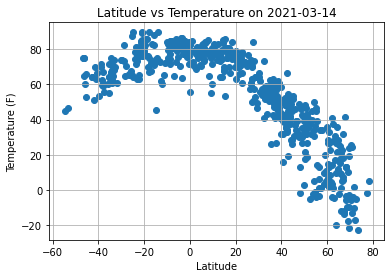

In [21]:
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

## Latitude vs. Humidity Plot

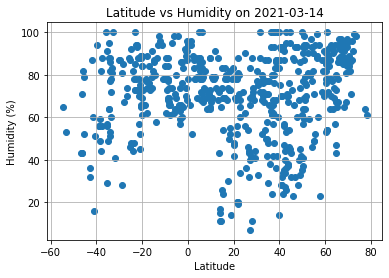

In [22]:
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

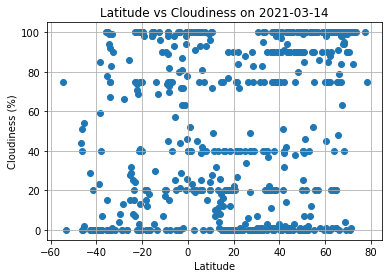

In [23]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

## Latitude vs. Wind Speed Plot

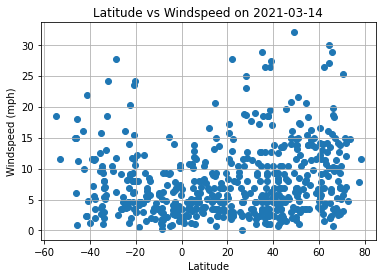

In [24]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

## Linear Regression

In [25]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [26]:
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.9021842587696229
y = -1.22x + 92.14


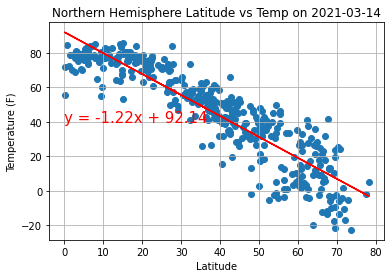

In [27]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.6125164572180616
y = 0.43x + 82.89


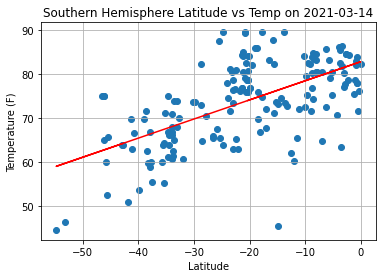

In [28]:

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.17773872757133585
y = 0.19x + 62.99


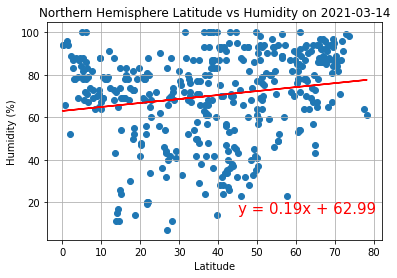

In [29]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.3223174044744282
y = 0.39x + 81.38


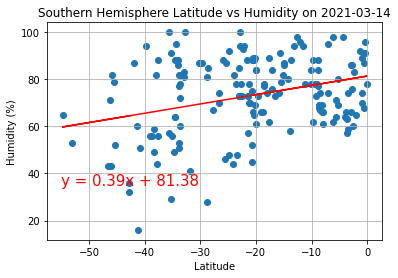

In [30]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.28840974321654783
y = 0.58x + 28.35


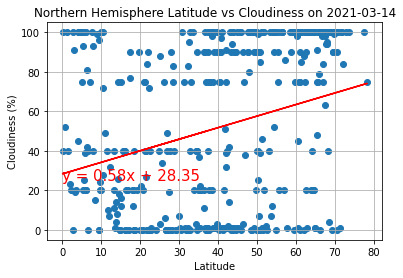

In [31]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.2818466437804966
y = 0.82x + 63.07


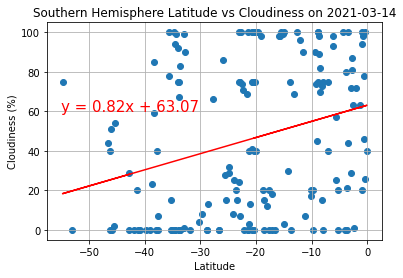

In [32]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.2212231876043802
y = 0.07x + 5.83


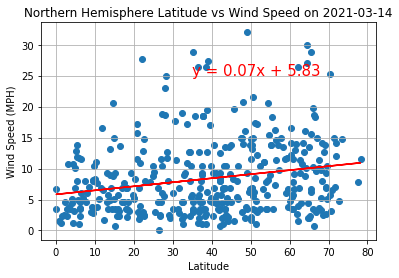

In [33]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.34915385202569765
y = -0.14x + 4.23


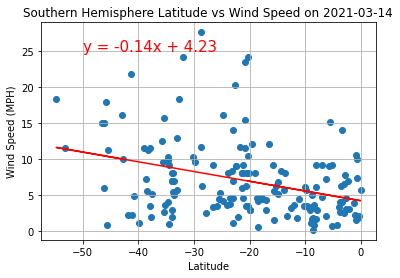

In [34]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

In [ ]:
wind speed against their latitude
The result reveals no correlation between latitude and wind speed.